# Miniproject 5 : PCA, Support Vector Machines and CNN

Total Points: 15     

Task 1 and Tas 2 : 5 Points      
Task 3:            10 points (Alternative to your take home exam.)


### Task 1: 
Recreate Fig 12.4 from the book for USArrest Data.         

Comment (4 peices of information) on two different plots PCA visualization using two principal components with and without scaling the data.         

(Note: You can refer to the github repo I introduced at the beginning of the course.)


In [28]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
US_Arrests = pd.read_csv('USArrests.csv', index_col=0)
US_Arrests.head()



,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [29]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(US_Arrests), index=US_Arrests.index, columns=US_Arrests.columns)
X_unscaled =  pd.DataFrame(US_Arrests, index=US_Arrests.index, columns=US_Arrests.columns)
from sklearn.decomposition import PCA
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=US_Arrests.columns, columns=['Murder', 'Assault', 'UrbanPop', 'Rape'])
pca_loadings_unscaled = pd.DataFrame(PCA().fit(X_unscaled).components_.T, index=US_Arrests.columns, columns=['Murder', 'Assault', 'UrbanPop', 'Rape'])

In [30]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC_1', 'PC_2', 'PC_3', 'PC_4'])
df_plot.head()

,PC_1,PC_2,PC_3,PC_4
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


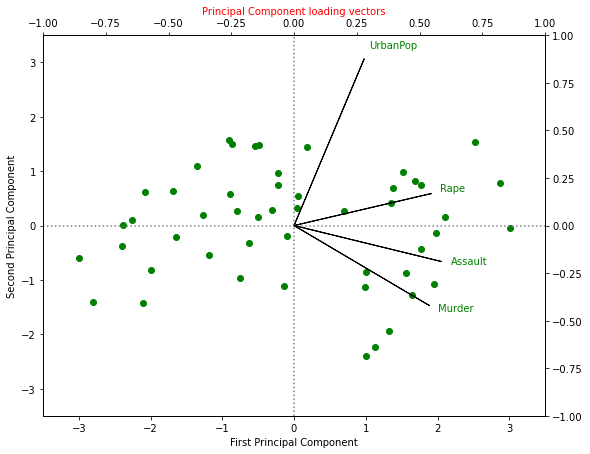

In [31]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
# Plot Principal Components 1 and 2
x_comp=[]
y_comp=[]
for i in df_plot.index:
    x_comp.append(df_plot.PC_1.loc[i])
    y_comp.append(-df_plot.PC_2.loc[i])
ax1.scatter(x_comp,y_comp,color='green')
    #ax1.scatter(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
#plt.subplot(ax1) 
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')
a=1.07
# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and ta = 1.07
for i in pca_loadings[['Murder', 'Assault','UrbanPop','Rape']].index:
    ax2.annotate(i, (pca_loadings.Murder.loc[i]*a, -pca_loadings.Assault.loc[i]*a), color='green')
# Plot vectors
ax2.arrow(0,0,pca_loadings.Murder[0], -pca_loadings.Assault[0])
ax2.arrow(0,0,pca_loadings.Murder[1], -pca_loadings.Assault[1])
ax2.arrow(0,0,pca_loadings.Murder[2], -pca_loadings.Assault[2])
ax2.arrow(0,0,pca_loadings.Murder[3], -pca_loadings.Assault[3])

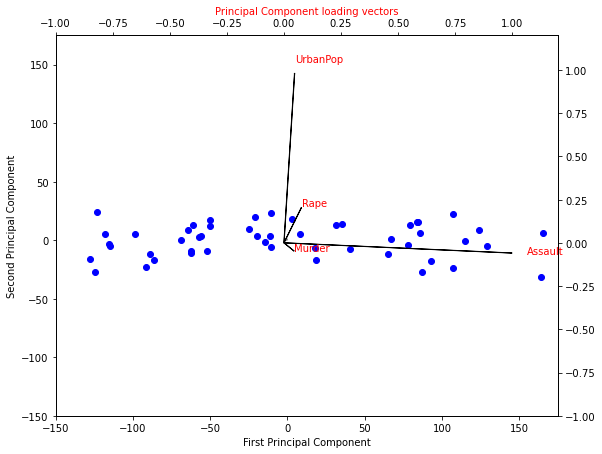

In [32]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X_unscaled), columns=['PC_1', 'PC_2', 'PC_3', 'PC_4'])
df_plot.head()
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-150,175)
ax1.set_ylim(-150,175)
# Plot Principal Components 1 and 2
x_comp=[]
y_comp=[]
for i in df_plot.index:
    x_comp.append(df_plot.PC_1.loc[i])
    y_comp.append(-df_plot.PC_2.loc[i])
ax1.scatter(x_comp,y_comp,color='blue')
    #ax1.scatter(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
#plt.subplot(ax1) 
# Plot reference lines
ax1.hlines(0,-1,1.2, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1.2)
ax2.set_xlim(-1,1.2)
ax2.set_xlabel('Principal Component loading vectors', color='red')
a=1.07


# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and ta = 1.07
for i in pca_loadings_unscaled[['Murder', 'Assault','UrbanPop','Rape']].index:
    ax2.annotate(i, (pca_loadings_unscaled.Murder.loc[i]*a, -pca_loadings_unscaled.Assault.loc[i]*a), color='red')
# Plot vectors
ax2.arrow(0,0,pca_loadings_unscaled.Murder[0], -pca_loadings_unscaled.Assault[0])
ax2.arrow(0,0,pca_loadings_unscaled.Murder[1], -pca_loadings_unscaled.Assault[1])
ax2.arrow(0,0,pca_loadings_unscaled.Murder[2], -pca_loadings_unscaled.Assault[2])
ax2.arrow(0,0,pca_loadings_unscaled.Murder[3], -pca_loadings_unscaled.Assault[3])

### Task 2: 
Separating concentric circles using PCA and KPCA    

1. Create a 1000 data points of two concentric circles, and plot data points from two circles in  color red and blue.      

You can use the make_circles function from sklearn.dataset to do this.       
make_circles(n_samples, random_state, noise, factor)      
use:   n_samples = 1000, random_state = 123, noise = 0.1, factor = 0.2     

2. Do PCA on the data and visualize PC decomposition using 2 PCs. 

3. Implement Kernel PCA using RBF kernel.      
You can use KernelPCA from sklearn.decomposition

3. Do KPCA visualization using two Kernel PCs and compare with Linear PCA visualization. You might want to try with different gamma for RBF. For example, case1: Gamma = 5, case2: Gamma = 15.      

4. Repeat 1-3 for half moon data. 

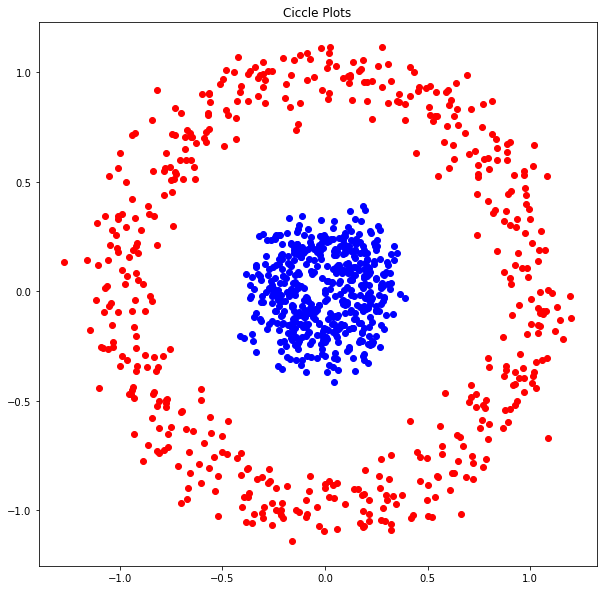

In [43]:
from sklearn.datasets import make_circles

x, y = make_circles(n_samples=1000, 
                    random_state=123, 
                    noise=0.1, 
                    factor=0.2)


plt.figure(figsize=(10, 10))
plt.scatter(x[y==0, 0], x[y==0, 1], color='red')
plt.scatter(x[y==1, 0], x[y==1, 1], color='blue')
plt.title("Ciccle Plots")
plt.show()

In [59]:
def pca_plot(x, title):    
    plt.scatter(x[y==0, 0], x[y==0, 1], 
                    color='red')
    plt.scatter(x[y==1, 0], x[y==1, 1], 
                    color='blue')
    plt.title(title)
    plt.show

In [60]:
pca = PCA(n_components=2)
x_pca_2 = pca.fit(x).transform(x)

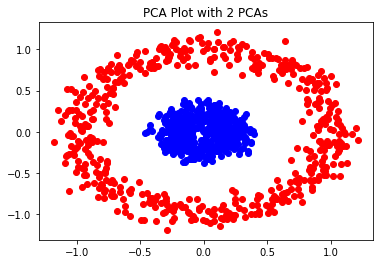

In [61]:
pca_plot(x_pca_2, "PCA Plot with 2 PCAs")

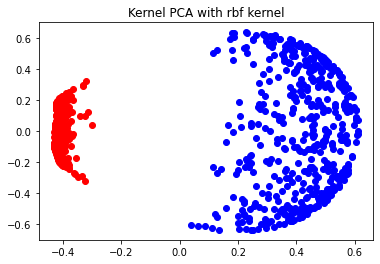

In [62]:
from sklearn.decomposition import KernelPCA

kernel_pca_5 = KernelPCA(kernel='rbf', gamma=5)
x_kpca_5 = kernel_pca_5.fit_transform(x)
pca_plot(x_kpca_5, "Kernel PCA with rbf kernel, gamma = 2")

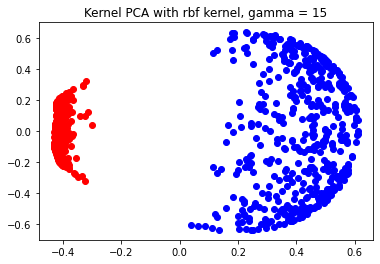

In [63]:
kernel_pca_15 = KernelPCA(kernel='rbf', gamma=15)
x_kpca_15 = kernel_pca_15.fit_transform(x)
pca_plot(x_kpca_5, "Kernel PCA with rbf kernel, gamma = 15")

/Users/shakilrafi/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


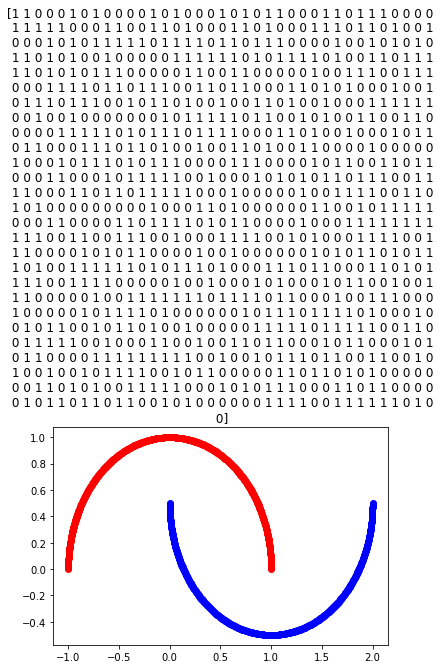

In [64]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=1000, 
                random_state=1)

pca_plot(x,y)

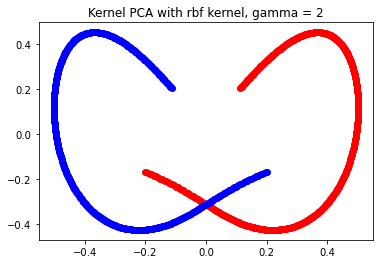

In [65]:
kernel_pca_5 = KernelPCA(kernel='rbf', gamma=5)
x_kpca_5 = kernel_pca_5.fit_transform(x)
pca_plot(x_kpca_5, "Kernel PCA with rbf kernel, gamma = 2")

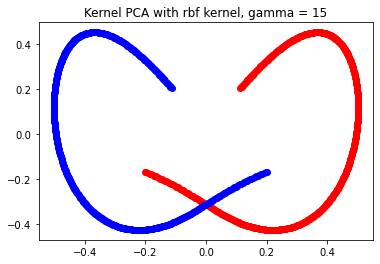

In [66]:
kernel_pca_15 = KernelPCA(kernel='rbf', gamma=15)
x_kpca_15 = kernel_pca_15.fit_transform(x)
pca_plot(x_kpca_5, "Kernel PCA with rbf kernel, gamma = 15")

### Task 3: 
MNIST data classification using neural nets and CNN in pytorch.    
1. Perform  classification on MNIST data using fully connected neural nets.      
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627      

2. Perform  classification on MNIST data using convolutional neural nets.  
https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118

Note: The links provided here are jsut some examples, there are millions tutorials available, feel free to use any as your reference. 

#### Task 3 Part 1

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [4]:
trainset = datasets.MNIST('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', download=True, train=True, transform=transform)
valset = datasets.MNIST('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

9913344it [00:02, 3707624.90it/s]                             


Extracting http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz/MNIST/raw/train-images-idx3-ubyte.gz to http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz/MNIST/raw



29696it [00:00, 9442350.97it/s]          


Extracting http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz/MNIST/raw/train-labels-idx1-ubyte.gz to http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz/MNIST/raw



1649664it [00:00, 3213117.88it/s]                             


Extracting http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz/MNIST/raw/t10k-images-idx3-ubyte.gz to http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz/MNIST/raw



5120it [00:00, 13190931.50it/s]         


Extracting http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz/MNIST/raw/t10k-labels-idx1-ubyte.gz to http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz/MNIST/raw



9913344it [00:02, 3650702.57it/s]                             


Extracting http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz/MNIST/raw/train-images-idx3-ubyte.gz to http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz/MNIST/raw



29696it [00:00, 11509337.61it/s]         


Extracting http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz/MNIST/raw/train-labels-idx1-ubyte.gz to http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz/MNIST/raw



1649664it [00:00, 3327030.62it/s]                            


Extracting http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz/MNIST/raw/t10k-images-idx3-ubyte.gz to http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz/MNIST/raw



5120it [00:00, 4113165.39it/s]          

Extracting http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz/MNIST/raw/t10k-labels-idx1-ubyte.gz to http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz/MNIST/raw



In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


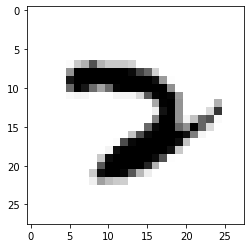

In [6]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

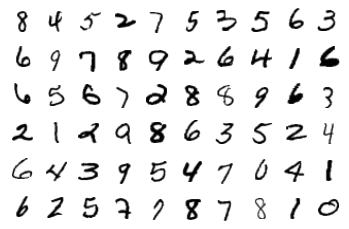

In [7]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [8]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [9]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [10]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [ 0.0013,  0.0013,  0.0013,  ...,  0.0013,  0.0013,  0.0013],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003]])


In [12]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.65260090649541
Epoch 1 - Training loss: 0.2833742742726544
Epoch 2 - Training loss: 0.22170979018682546
Epoch 3 - Training loss: 0.17883604963911748
Epoch 4 - Training loss: 0.15035570237928553
Epoch 5 - Training loss: 0.12744954565087202
Epoch 6 - Training loss: 0.11141645049612754
Epoch 7 - Training loss: 0.09943501669357517
Epoch 8 - Training loss: 0.08838300649990151
Epoch 9 - Training loss: 0.08121731915453603
Epoch 10 - Training loss: 0.07471452727228768
Epoch 11 - Training loss: 0.06879752755923661
Epoch 12 - Training loss: 0.06296675295374397
Epoch 13 - Training loss: 0.05913078612777025
Epoch 14 - Training loss: 0.05323543172649372

Training Time (in minutes) = 1.7497223297754922


In [14]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 8


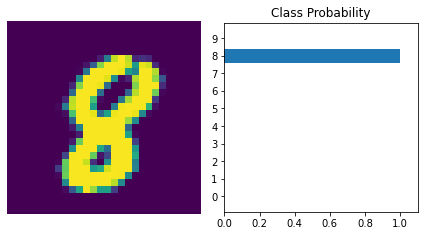

In [15]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [16]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9725


In [17]:
torch.save(model, './my_mnist_model.pt')

#### Task 3 Part 2

# No need to check for cuda as I know for a fact I don't have an Nvidia GPU

In [18]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

9913344it [00:02, 3604390.81it/s]                             


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



29696it [00:00, 5570395.87it/s]          


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



1649664it [00:00, 3300758.70it/s]                             


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



5120it [00:00, 16673009.69it/s]         

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [19]:
print(train_data)
print(test_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [20]:
print(train_data.data.size())
print(train_data.targets.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


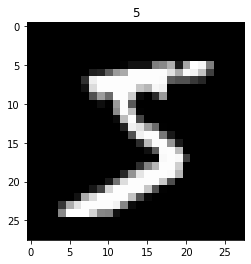

In [21]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

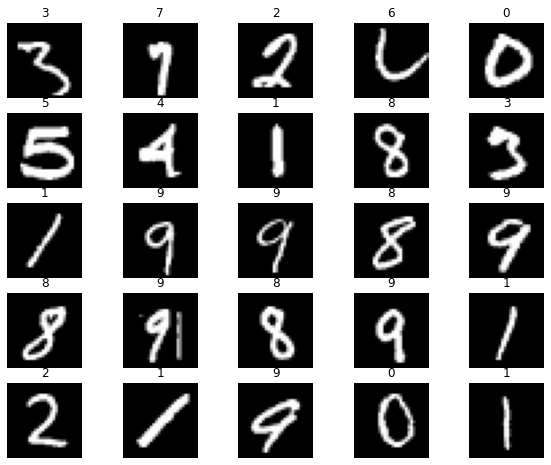

In [22]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [23]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f919111a9a0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f919111a790>}

In [24]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization

In [25]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [26]:
loss_func = nn.CrossEntropyLoss()   
loss_func

CrossEntropyLoss()

In [27]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [42]:
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                pass
        pass
    
    
    pass
train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/600], Loss: 0.1921
Epoch [1/10], Step [200/600], Loss: 0.0792
Epoch [1/10], Step [300/600], Loss: 0.0473
Epoch [1/10], Step [400/600], Loss: 0.1111
Epoch [1/10], Step [500/600], Loss: 0.0654
Epoch [1/10], Step [600/600], Loss: 0.0523
Epoch [2/10], Step [100/600], Loss: 0.0345
Epoch [2/10], Step [200/600], Loss: 0.0743
Epoch [2/10], Step [300/600], Loss: 0.0632
Epoch [2/10], Step [400/600], Loss: 0.0062
Epoch [2/10], Step [500/600], Loss: 0.0250
Epoch [2/10], Step [600/600], Loss: 0.0826
Epoch [3/10], Step [100/600], Loss: 0.0197
Epoch [3/10], Step [200/600], Loss: 0.1263
Epoch [3/10], Step [300/600], Loss: 0.1273
Epoch [3/10], Step [400/600], Loss: 0.0152
Epoch [3/10], Step [500/600], Loss: 0.0178
Epoch [3/10], Step [600/600], Loss: 0.0504
Epoch [4/10], Step [100/600], Loss: 0.0080
Epoch [4/10], Step [200/600], Loss: 0.0067
Epoch [4/10], Step [300/600], Loss: 0.0681
Epoch [4/10], Step [400/600], Loss: 0.0379
Epoch [4/10], Step [500/600], Loss: 0.0491
Epoch [4/10

In [51]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
        print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    
        pass
test()

Test Accuracy of the model on the 10000 test images: 0.99


In [52]:
sample = next(iter(loaders['test']))
imgs, lbls = sample

In [53]:
actual_number = lbls[:10].numpy()
actual_number

array([0, 6, 5, 8, 1, 8, 5, 2, 3, 0])

In [54]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [0 6 5 8 1 8 5 2 3 0]
Actual number: [0 6 5 8 1 8 5 2 3 0]
